In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
names = ['lettr capital letter ','x-box horizontal position of box', 'y-box vertical position of box', 'width width of box', 
         'high height of box', 'onpix total # on pixels','x-bar mean x of on pixels in box','y-bar mean y of on pixels in box',
         'x2bar mean x variance','y2bar mean y variance','xybar mean x y correlation','x2ybr mean of x * x * y',
         'xy2br mean of x * y * y','x-ege mean edge count left to right','xegvy correlation of x-ege with y',
         'y-ege mean edge count bottom to top','yegvx correlation of y-ege with x']
df = pd.read_csv(url, names=names)

In [ ]:
features=['x-box horizontal position of box', 'y-box vertical position of box', 'width width of box', 'high height of box', 'onpix total # on pixels','x-bar mean x of on pixels in box','y-bar mean y of on pixels in box','x2bar mean x variance','y2bar mean y variance','xybar mean x y correlation','x2ybr mean of x * x * y','xy2br mean of x * y * y','x-ege mean edge count left to right','xegvy correlation of x-ege with y','y-ege mean edge count bottom to top','yegvx correlation of y-ege with x']
x=df.loc[:,features].values
y=df.loc[:,['lettr capital letter ']].values
x=StandardScaler().fit_transform(x)


In [ ]:
pca =PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDF = pd.DataFrame(data=principalComponents
                           ,columns=['principal component 1','principal component 2'])

In [ ]:
finalDF =pd.concat([principalDF,df[['lettr capital letter ']]],axis = 1)

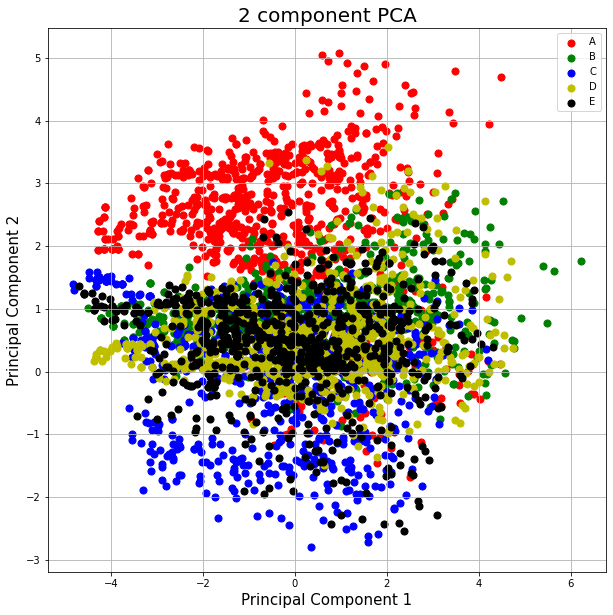

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel( "Principal Component 1", fontsize = 15)
ax.set_ylabel( "Principal Component 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize =20)
targets = ('A', 'B', 'C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z')
colors =('r','g','b','y','k')
for target, color in zip(targets,colors):
  indicesToKeep = finalDF['lettr capital letter '] == target
  ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'],
             finalDF.loc[indicesToKeep, 'principal component 2'],
             c= color, 
             s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
pca.explained_variance_ratio_

array([0.26846157, 0.1640901 ])